# Project 8 

#### Importing the relevant libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Task 2:

In [79]:
df = pd.read_csv('auto-mpg.data',sep = '\t')
df.head()

,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500


## Task 3:

Since the dataframe do not have column heading and the first row is set as column, For now I am going to name the columns as 'Column 1' and 'Column 2'. Since 7 columns are merged into one. 

In [80]:
df.columns = ['Column 1', 'name of car']
df.head()

,Column 1,name of car
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500


In [81]:
new = df['Column 1'].str.split("   ", n = 3, expand = True)
new

,0,1,2,3
0,15.0,8,350.0,165.0 3693. 11.5 70 1
1,18.0,8,318.0,150.0 3436. 11.0 70 1
2,16.0,8,304.0,150.0 3433. 12.0 70 1
3,17.0,8,302.0,140.0 3449. 10.5 70 1
4,15.0,8,429.0,198.0 4341. 10.0 70 1
...,...,...,...,...
392,27.0,4,140.0,86.00 2790. 15.6 82 1
393,44.0,4,97.00,52.00 2130. 24.6 82 2
394,32.0,4,135.0,84.00 2295. 11.6 82 1
395,28.0,4,120.0,79.00 2625. 18.6 82 1


In [82]:
#new1 = new.str.split(" ", n = 1, expand = True)
df['mpg'] = new[0]
df['cylinders'] = new[1]
df['displacement'] = new[2]
df['column 4'] = new[3]

new = df['column 4'].str.split('      ', n = 2, expand = True)
new
df['horsepower'] = new[0]
df['weight'] = new[1]
df['Column 7'] = new[2]

new = df['Column 7'].str.split('  ', n = 3, expand = True)
df['acceleration'] = new[0]
df['model year'] = new[1]
df['origin'] = new[2]
df.drop(columns=['Column 1','column 4','Column 7'],inplace = True)
df.head()

,name of car,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,buick skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,1
1,plymouth satellite,18.0,8,318.0,150.0,3436.,11.0,70,1
2,amc rebel sst,16.0,8,304.0,150.0,3433.,12.0,70,1
3,ford torino,17.0,8,302.0,140.0,3449.,10.5,70,1
4,ford galaxie 500,15.0,8,429.0,198.0,4341.,10.0,70,1


Rearranging column names as per original dataset

In [83]:
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name of car']
df = df.reindex(columns=column_names)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name of car
0,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.,10.0,70,1,ford galaxie 500


## Task 4:

Replacing '?' with Nan values for horsepower and also coverting appropiate columns to numeric values from string

In [96]:
df['horsepower'] = df['horsepower'].replace('   ?',np.nan)
df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']] = df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']].apply(pd.to_numeric)
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
name of car      object
dtype: object

## Task 5:

### Now changing the value of origin from 1,2,3 to USA Asia and Europe

In [99]:
df['origin'] = df['origin'].replace(to_replace = [1,2,3], value = ['USA','Asia','Europe'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name of car
0,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,USA,ford galaxie 500


## Task 6: Bar chart

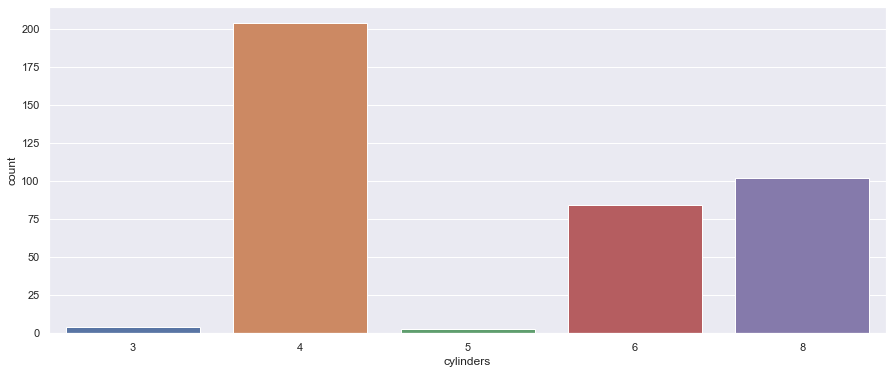

In [102]:
plt.figure(figsize=(15,6));
sns.countplot(data = df, x='cylinders',dodge = True)

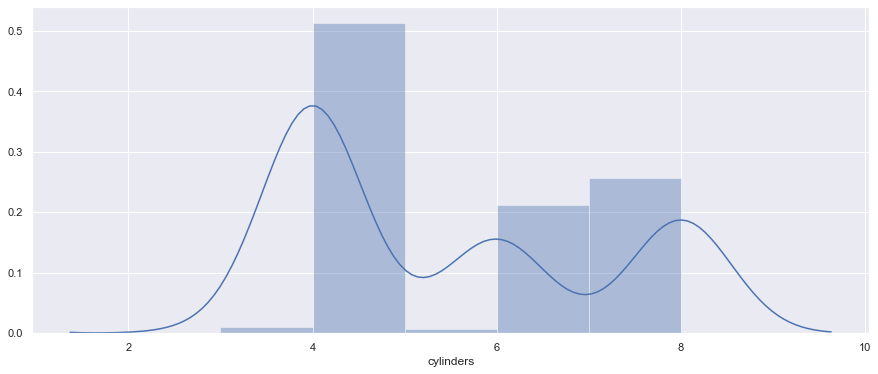

In [106]:
plt.figure(figsize=(15,6));
sns.distplot(df['cylinders']);

## Task 7: Scatter Plot

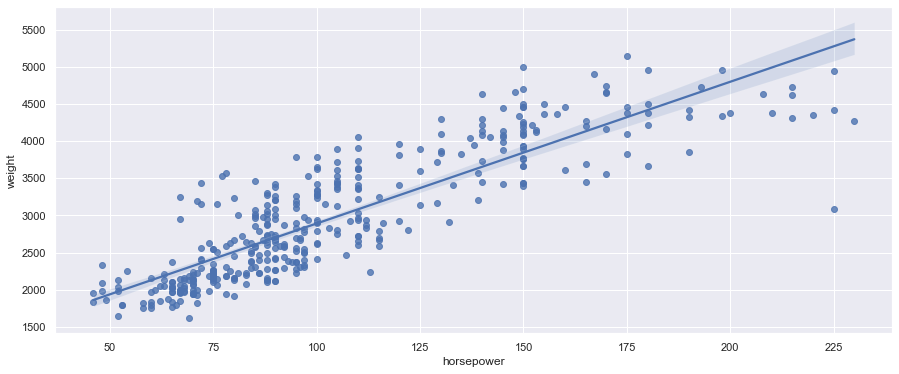

In [105]:
plt.figure(figsize=(15,6));
sns.regplot(x='horsepower',y='weight',data = df)

## Task 8:

### Question 1: What relationship can be deduced from scatterplot between horspower and weight:
#### Answer: There is a positve linear relation between weight and horspower. As weight increases the horspower rating of the car increases
### Question 2: What can you tell about the distribution of cylinders in task 6?
#### Answer: The cars with 4 cylinders are most common followed by 8. The rest are very rare. The distribution is approximately right skewed.